In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
class LinearRegression:
    def fit(self, X, y, intercept=False):
        if intercept is False: # adding intercept if not present in input X
            ones = np.ones(X.shape[0]).reshape(len(X), 1)
            X = np.concatenate((ones, X), axis=1)
        self.X = np.array(X)
        self.y = np.array(y)
        self.N, self.D = self.X.shape
        XtX = np.dot(self.X.T, self.X)
        XtX_inv = np.linalg.inv(XtX)
        Xty = np.dot(self.X.T, self.y)
        self.beta_hats = np.dot(XtX_inv, Xty)
        self.y_hat = np.dot(self.X, self.beta_hats)
        self.L = 0.5* np.sum((self.y - self.y_hat) ** 2)

    def predict(self, X_test, intercept = False):
        if intercept is False: # adding intercept if not present in input X
            ones = np.ones(X_test.shape[0]).reshape(len(X_test), 1)
            X_test = np.concatenate((ones, X_test), axis=1)
        self.y_test_hat = np.dot(X_test, self.beta_hats)
        return self.y_test_hat

## Sklearn Implimentation

In [10]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [12]:
X, y = fetch_california_housing(as_frame=True, return_X_y=True)

In [16]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
model = LinearRegression() # instantiate model
model.fit(Xtrain, ytrain, intercept = False) # fit model

In [30]:
y_pred = model.predict(Xtest) # predict on test set

In [31]:
y_pred

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251], shape=(4128,))

In [ ]:
df = fetch_california_housing(as_frame=True)
final_df = pd.merge(pd.DataFrame(df['data']), pd.DataFrame(df['target']), left_index=True, right_index=True)

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

X_train = df['data']
y_train = df['target']

In [49]:
from sklearn.linear_model import LinearRegression
sklearn_model = LinearRegression()
sklearn_model.fit(X_train, y_train);

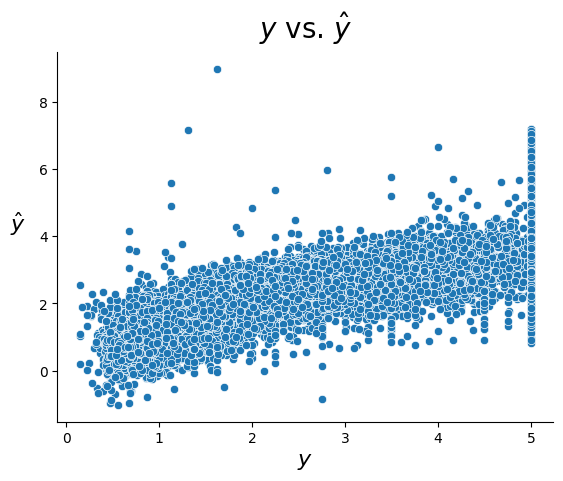

In [52]:
sklearn_predictions = sklearn_model.predict(X_train)
fig, ax = plt.subplots()
sns.scatterplot(x=y_train, y=sklearn_predictions)  # ✅ Correct
ax.set_xlabel(r'$y$', size=16)
ax.set_ylabel(r'$\hat{y}$', rotation=0, size=16, labelpad=15)
ax.set_title(r'$y$ vs. $\hat{y}$', size=20, pad=10)
sns.despine()


In [53]:
predictors = df.feature_names
beta_hats = sklearn_model.coef_
print('\n'.join([f'{predictors[i]}: {round(beta_hats[i], 3)}' for i in range(3)]))

MedInc: 0.437
HouseAge: 0.009
AveRooms: -0.107


In [54]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.6 MB 8.5 MB/s eta 0:00:02
   ------ --------------------------------- 1.6/9.6 MB 8.4 MB/s eta 0:00:01
   ------- -------------------------------- 1.8/9.6 MB 4.6 MB/s eta 0:00:02
   -------- ------------------------------- 2.1/9.6 MB 2.9 MB/s eta 0:00:03
   --------- ------------------------------ 2.4/9.6 MB 2.5 MB/s eta 0:00:03
   ---------- ----------------------------- 2.6/9.6 MB 2.5 MB/s eta 0:00:03
   ---------- ----------------------------- 2.6/9.6 MB 2.5 MB/s eta 0:00:03
   ------------- -------------------------- 3.1/9.6 MB 2.0 MB/s eta 0:00:04
   ------------- -------------------------- 3.1/9.6 MB 2.0 MB/s eta 0:00:04
   ------------- -------------------------- 3.1/9.6 MB 2.0 MB/s eta 0:00:04
   -------------- ------------------------- 3.4/9.6 MB 1.5 MB/s eta 0:00:05
   --------------- ------------------------ 3.7/9.6 MB 1.5 MB/s eta 0:00:05
   --------------- 

In [55]:
import statsmodels.api as sm

X_train_with_constant = sm.add_constant(X_train)
sm_model1 = sm.OLS(y_train, X_train_with_constant)
sm_fit1 = sm_model1.fit()
sm_predictions1 = sm_fit1.predict(X_train_with_constant)

In [63]:
import pandas as pd
new_df = pd.DataFrame(X_train, columns = df['feature_names'])
new_df['target'] = y_train
display(new_df.head())

formula = 'target ~ ' + ' + '.join(df['feature_names'])
print('formula:', formula)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


formula: target ~ MedInc + HouseAge + AveRooms + AveBedrms + Population + AveOccup + Latitude + Longitude


In [65]:
import statsmodels.formula.api as smf

sm_model2 = smf.ols(formula, data = new_df)
sm_fit2 = sm_model2.fit()
sm_predictions2 = sm_fit2.predict(new_df)